In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
mpg = pd.read_csv('mpg.csv')

In [34]:
mpg\
    .assign(total = (mpg['hwy'] + mpg['cty']) / 2 )\
    .groupby('trans')\
    .agg(
        고속도로연비평균 = ('hwy', 'mean'),
        도심연비평균 = ('cty', 'mean'),
        전체평균 = ('total', 'mean'),
        자동차갯수 = ('trans', 'count'),
    )\
    .sort_values('도심연비평균', ascending = False)\
    .head()

,고속도로연비평균,도심연비평균,전체평균,자동차갯수
trans,,,,
auto(l3),27.000000,21.000000,24.000000,2
auto(av),27.800000,20.000000,23.900000,5
manual(m5),26.293103,19.258621,22.775862,58
auto(s4),25.666667,18.666667,22.166667,3
auto(s6),25.187500,17.375000,21.281250,16


In [35]:
mpg\
    .assign(total = (mpg['hwy'] + mpg['cty']) / 2 )\
    .groupby('fl')\
    .agg(
        고속도로연비평균 = ('hwy', 'mean'),
        도심연비평균 = ('cty', 'mean'),
        전체평균 = ('total', 'mean'),
        자동차갯수 = ('fl', 'count'),
    )\
    .sort_values('도심연비평균', ascending = False)\
    .head()

,고속도로연비평균,도심연비평균,전체평균,자동차갯수
fl,,,,
d,33.600000,25.600000,29.600000,5
c,36.000000,24.000000,30.000000,1
p,25.230769,17.365385,21.298077,52
r,22.994048,16.738095,19.866071,168
e,13.250000,9.750000,11.500000,8


In [37]:
test1 = pd.DataFrame({
    'id' : [1, 2, 3, 4, 5],
    'midterm' : [60, 80, 70, 90, 85]
})
test2 = pd.DataFrame({
    'id' : [1, 2, 3, 4, 5],
    'finalterm' : [70, 83, 65, 95, 80]
})
pd.merge(test1, test2, how = 'left', on = 'id')

,id,midterm,finalterm
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [39]:
fuel = pd.DataFrame({
    'fl' : ['c', 'd', 'e', 'p', 'r'],
    'price_fl' : [2.35, 2.38, 2.11, 2.76, 2.22]
})
pd.merge(mpg, fuel, on = 'fl', how = 'left')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,price_fl
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.76
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,2.76
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,2.76
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,2.76
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,2.76


In [45]:
group_a = pd.DataFrame({
    'id' : [1, 2, 3, 4, 5],
    'test' : [60, 80, 70, 90, 85]
})
group_b = pd.DataFrame({
    'id' : [6, 7, 8, 9, 10],
    'test' : [70, 83, 65, 95, 80]
})
group_c = pd.DataFrame({
    'id' : [16, 17, 18, 19, 20],
    'test' : [70, 83, 65, 95, 80],
    'grade' : ['a', 'b','b','a','c']
})
pd.concat([group_a, group_b, group_c], ignore_index = True)

,id,test,grade
0,1,60,NaN
1,2,80,NaN
2,3,70,NaN
3,4,90,NaN
4,5,85,NaN
5,6,70,NaN
6,7,83,NaN
7,8,65,NaN
8,9,95,NaN
9,10,80,NaN


In [55]:
df = pd.DataFrame({
    'class'  : [1, 2, 4, 3, 4, 1],
    'score' :[5, 4, 3, 4, 2, 6]
})
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df['class'] = np.where(df['class'] == 4, np.nan, df['class'])
# df.dropna(subset = ['class', 'score']) \
#     .groupby('class')\
#     .agg(mean_score = ('score', 'mean'))
df.dropna(subset=['score'])
df['class'] = df['class'].fillna(1)
df\
    .groupby('class')\
    .agg(mean_score = ('score', 'mean'))

,mean_score
class,
1.0,3.333333
2.0,4.000000
3.0,4.000000


<Axes: ylabel='hwy'>

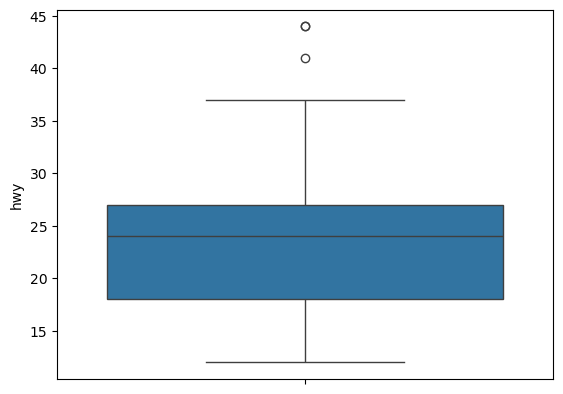

In [81]:
mpg = pd.read_csv('mpg.csv')
sns.boxplot(data = mpg, y = 'hwy')

In [82]:
mpg.query('hwy < 4.5 | hwy > 40.5')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [83]:
mpg['hwy'] = np.where( (mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5),
                        np.nan, mpg['hwy']
                     )

In [84]:
mpg['hwy'].isna().sum()

np.int64(3)

In [85]:
mpg['hwy'] = np.where(mpg['hwy'].isna(), 24, mpg['hwy'])

In [86]:
mpg.query('hwy < 4.5 | hwy > 40.5')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category


In [87]:
mpg['hwy'].isna().sum()

np.int64(0)

<Axes: ylabel='hwy'>

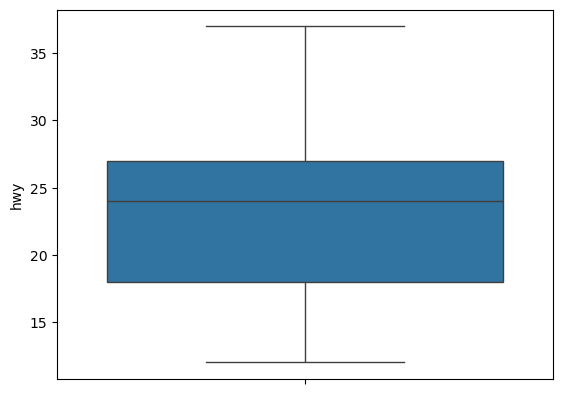

In [88]:
sns.boxplot(data = mpg, y = 'hwy')